# Библиотеки

In [51]:
import numpy
import scipy.special # библиотека scipy.special содержит сигмоиду expit()
import matplotlib.pyplot # библиотека для графического отображения массивов
import imageio
import glob

%matplotlib inline

In [52]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Класс нейронной сети

In [53]:
class neuralNetwork:

    def __init__(self, num_nodes_in_layers, learning_rate):
        self.num_nodes_in_layers = num_nodes_in_layers
        self.learning_rate = learning_rate
        self.activation_function = lambda x: scipy.special.expit(x)

        self.weights = []
        for layer in range(len(self.num_nodes_in_layers) - 1):
            cols = self.num_nodes_in_layers[layer + 1]
            rows = self.num_nodes_in_layers[layer]
            weight = numpy.random.rand(cols, rows) - 0.5
            self.weights.append(weight)


    def train(self, inputs, target):
        inputs = numpy.array(inputs, ndmin=2).T
        target = numpy.array(target, ndmin=2).T
        
        # ПРЯМОЕ РАСПРОСТРАНЕНИЕ
        list_outputs = [] # Список всех выходных значений для обратного распространения
        list_outputs.append(inputs)
        output = inputs
        for layer in range(1, len(self.num_nodes_in_layers)):
            input = numpy.dot(self.weights[layer - 1], output)
            output =  self.activation_function(input)
            list_outputs.append(output)

        output_error = target - output # ошибка выходного слоя = (целевое значение - фактическое значение)

        # ОБРАТНОЕ РАСПРОСТРАНЕНИЕ
        layer_errors = [] # Список ошибок всех слоев
        layer_errors.append(output_error)
        cur_error = output_error
        for layer in range(len(self.num_nodes_in_layers) - 2, 0, -1): # Перебор в обратном порядке с шагом: -1
            next_error = numpy.dot(self.weights[layer].T, cur_error)
            layer_errors.append(next_error)
            cur_error = next_error
        layer_errors.reverse()

        # Обновить весовые коэффициенты
        for layer in range(len(self.num_nodes_in_layers) - 2, -1, -1): # Перебор в обратном порядке с шагом: -1
            self.weights[layer] += self.learning_rate * numpy.dot((layer_errors[layer] * list_outputs[layer + 1] * (1.0 - list_outputs[layer + 1])), numpy.transpose(list_outputs[layer]))


        return output


    def query(self, inputs):
        inputs = numpy.array(inputs, ndmin=2).T
    
        output = inputs
        for layer in range(1, len(self.num_nodes_in_layers)):
            input = numpy.dot(self.weights[layer - 1], output)
            output =  self.activation_function(input)
        
        return output


# Загрузка тренировочной выборки MNIST (60000)

In [54]:
training_data_file = open("/content/drive/MyDrive/mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
# training_data_list

# Параметры сети

In [55]:
NUM_NODES_IN_LAYERS = [784, 200, 10]
LEARNING_RATE = 0.1

# Тренировка сети

In [56]:
n = neuralNetwork(NUM_NODES_IN_LAYERS, LEARNING_RATE)
epochs = 5

scorecard = []

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(NUM_NODES_IN_LAYERS[len(NUM_NODES_IN_LAYERS) - 1]) + 0.01
        targets[int(all_values[0])] = 0.99
        outputs = n.train(inputs, targets)
        
        label = numpy.argmax(outputs)
        correct_label = int(all_values[0])
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)

scorecard_array = numpy.asarray(scorecard)
print("Эффективность = ", scorecard_array.sum() / scorecard_array.size)

Эффективность =  0.97038


# Загрузка тестовой выборки MNIST (10000)

In [57]:
test_data_file = open("/content/drive/MyDrive/mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
# test_data_list

# Тестирование сети

In [58]:
scorecard = [] # журнал оценок работы сети, первоначально пустой

# перебрать все записи в тестовом наборе данных
for record in test_data_list:
    # print(record)
    all_values = record.split(',') # получить список значений из записи, используя символы запятой (',') в качестве разделителей
    
    # img_array = numpy.asfarray(all_values[1:]).reshape(28, 28)
    # matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    # matplotlib.pyplot.show()

    correct_label = int(all_values[0]) # правильный ответ - первое значение
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 # масштабировать и сместить входные значения
    outputs = n.query(inputs) # опрос сети
    label = numpy.argmax(outputs) # индекс наибольшего значения является маркерным значением
    # присоединить оценку ответа сети к концу списка
    if (label == correct_label):
        scorecard.append(1) # в случае правильного ответа сети присоединить к списку значение 1
    else:
        scorecard.append(0) # в случае неправильного ответа сети присоединить к списку значение 0

# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print("Эффективность = ", scorecard_array.sum() / scorecard_array.size)

Эффективность =  0.9736


# Небольшая визуализация

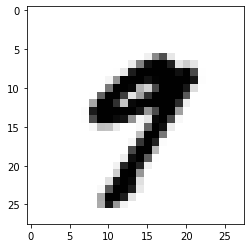

Выходные значения:
0 - [0.00888193]
1 - [0.00048202]
2 - [0.00045069]
3 - [0.04154117]
4 - [0.01155164]
5 - [0.00094686]
6 - [0.00089413]
7 - [0.04603872]
8 - [0.0040922]
9 - [0.96787241]
NN say: 9


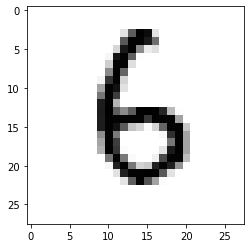

Выходные значения:
0 - [0.01496932]
1 - [0.00246902]
2 - [0.00129559]
3 - [0.00180054]
4 - [0.01264437]
5 - [0.01633607]
6 - [0.97796686]
7 - [0.00147604]
8 - [0.00597178]
9 - [0.00442973]
NN say: 6


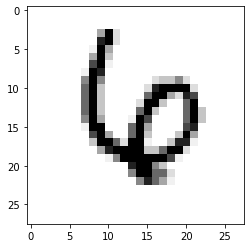

Выходные значения:
0 - [0.00826618]
1 - [0.00643401]
2 - [0.00930899]
3 - [0.00058842]
4 - [0.01870378]
5 - [0.01564439]
6 - [0.99721972]
7 - [0.00679085]
8 - [0.00357119]
9 - [0.00211105]
NN say: 6


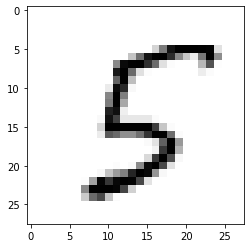

Выходные значения:
0 - [0.0010411]
1 - [0.00281773]
2 - [0.00079022]
3 - [0.00078116]
4 - [0.00186346]
5 - [0.99994997]
6 - [0.00337873]
7 - [0.00096983]
8 - [1.86624242e-05]
9 - [0.00371812]
NN say: 5


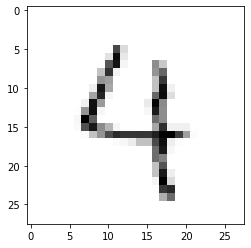

Выходные значения:
0 - [0.00330898]
1 - [0.00171064]
2 - [0.01052303]
3 - [0.00099026]
4 - [0.99191039]
5 - [0.00376391]
6 - [0.00119922]
7 - [0.00355377]
8 - [5.27544624e-05]
9 - [0.00611259]
NN say: 4


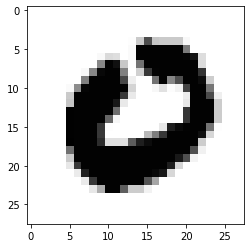

Выходные значения:
0 - [0.99911387]
1 - [0.00477687]
2 - [0.00066488]
3 - [0.00094613]
4 - [0.00724378]
5 - [0.00166784]
6 - [0.00617216]
7 - [0.00920225]
8 - [0.00390581]
9 - [0.00403198]
NN say: 0


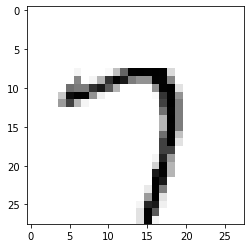

Выходные значения:
0 - [0.00161585]
1 - [0.00553463]
2 - [0.00447219]
3 - [0.00076533]
4 - [0.00142076]
5 - [0.01299237]
6 - [0.00033595]
7 - [0.9913359]
8 - [8.08426695e-05]
9 - [0.01149329]
NN say: 7


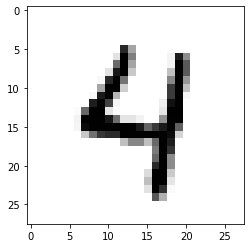

Выходные значения:
0 - [0.00285972]
1 - [0.00067313]
2 - [0.00333719]
3 - [0.00235204]
4 - [0.99963373]
5 - [0.00444894]
6 - [0.00069923]
7 - [0.00120594]
8 - [0.00010054]
9 - [0.00168891]
NN say: 4


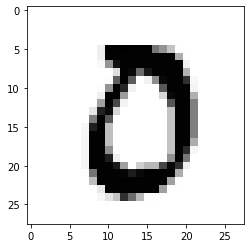

Выходные значения:
0 - [0.99969384]
1 - [0.01141031]
2 - [0.02232398]
3 - [0.00038515]
4 - [0.00302844]
5 - [0.00194222]
6 - [0.0014052]
7 - [0.00321662]
8 - [0.00012815]
9 - [0.00166863]
NN say: 0


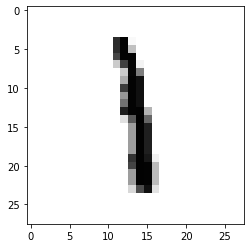

Выходные значения:
0 - [0.00689076]
1 - [0.99340706]
2 - [0.00634484]
3 - [0.01258651]
4 - [0.01944788]
5 - [0.0021646]
6 - [0.00314056]
7 - [0.00773128]
8 - [0.00210533]
9 - [0.00490794]
NN say: 1


In [59]:
my_data = test_data_list[20:30]

for record in my_data:
    all_values = record.split(',')

    img_array = numpy.asfarray(all_values[1:]).reshape(28, 28)
    matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)

    i = 0
    print("Выходные значения:")
    for o in outputs:
        print(i, '-', o)
        i = i + 1
    print("NN say: {0}".format(numpy.argmax(outputs)))

# Конвертирование PNG в CSV (с маркерным значением цифры на первом месте = формат MNIST)

In [66]:
import cv2, csv

file_ =  open('/content/drive/MyDrive/digits/my_mnist.csv', 'w')
writer = csv.writer(file_, delimiter=',')

for image_file_name in sorted(glob.glob('/content/drive/MyDrive/digits/?.png')):
    newline = []

    label = image_file_name[-5:-4]
    newline.append(label)

    img = cv2.imread(image_file_name, 0)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            newline.append(img[x, y])

    writer.writerow(newline)

file_.close()

# Загрузка рукописных цифр в формате MNIST

In [67]:
my_data_file = open('/content/drive/MyDrive/digits/my_mnist.csv', 'r')
my_data_list = my_data_file.readlines()
my_data_file.close()
# my_data_file

# Тестирование сети на рукописном наборе цифр

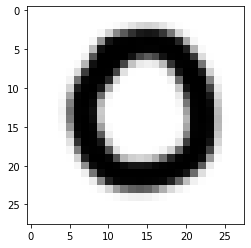

Выходные значения нейронной сети:
0 - [0.99830835]
1 - [0.00574372]
2 - [0.00048608]
3 - [0.00209002]
4 - [0.00951404]
5 - [0.0063705]
6 - [0.02591778]
7 - [0.00296584]
8 - [0.00866229]
9 - [0.00809864]
Ответ нейросети:  0


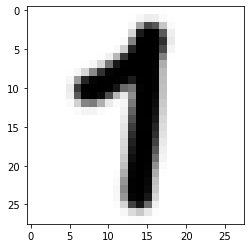

Выходные значения нейронной сети:
0 - [0.00801562]
1 - [0.11032724]
2 - [0.01711864]
3 - [0.01571046]
4 - [0.00174341]
5 - [0.00475248]
6 - [0.00923077]
7 - [0.0139648]
8 - [0.41326567]
9 - [0.081341]
Ответ нейросети:  8


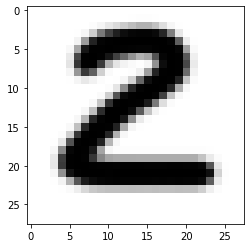

Выходные значения нейронной сети:
0 - [0.00887148]
1 - [0.01261357]
2 - [0.12424841]
3 - [0.45548135]
4 - [0.00371113]
5 - [0.08497527]
6 - [0.02940087]
7 - [0.00397513]
8 - [0.02232169]
9 - [0.01938029]
Ответ нейросети:  3


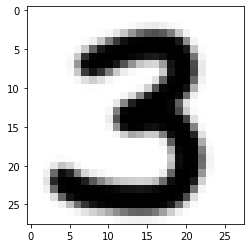

Выходные значения нейронной сети:
0 - [0.00319577]
1 - [0.00580769]
2 - [0.00245416]
3 - [0.99160397]
4 - [0.01966545]
5 - [0.00190353]
6 - [0.00257684]
7 - [0.00618347]
8 - [0.00106934]
9 - [0.02976721]
Ответ нейросети:  3


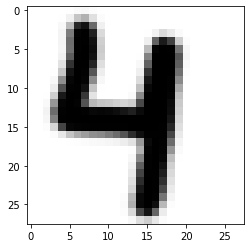

Выходные значения нейронной сети:
0 - [0.01042515]
1 - [0.0546203]
2 - [5.07179201e-05]
3 - [0.00098864]
4 - [0.93944894]
5 - [0.00886248]
6 - [0.00916011]
7 - [0.16013976]
8 - [0.0028395]
9 - [0.01389219]
Ответ нейросети:  4


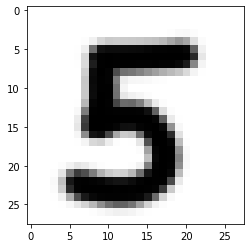

Выходные значения нейронной сети:
0 - [0.05623531]
1 - [0.00711478]
2 - [0.00658402]
3 - [0.02706993]
4 - [0.00535286]
5 - [0.91681273]
6 - [0.00797896]
7 - [0.00169586]
8 - [0.0029011]
9 - [0.01499984]
Ответ нейросети:  5


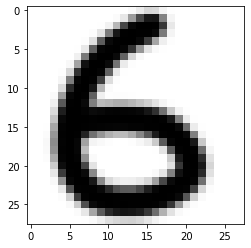

Выходные значения нейронной сети:
0 - [0.00276499]
1 - [0.00305486]
2 - [0.00609622]
3 - [0.01571719]
4 - [0.00986991]
5 - [0.11228438]
6 - [0.19869666]
7 - [0.00191101]
8 - [0.50462722]
9 - [0.47420176]
Ответ нейросети:  8


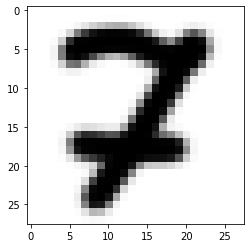

Выходные значения нейронной сети:
0 - [0.01481879]
1 - [0.00286219]
2 - [0.91004991]
3 - [0.07410671]
4 - [0.00649584]
5 - [0.006378]
6 - [0.04502217]
7 - [0.03738912]
8 - [0.00930695]
9 - [0.00236003]
Ответ нейросети:  2


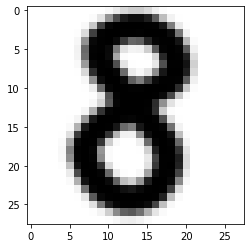

Выходные значения нейронной сети:
0 - [0.06286634]
1 - [0.00047688]
2 - [0.07835768]
3 - [0.20056913]
4 - [0.01723092]
5 - [0.0363686]
6 - [0.0226463]
7 - [0.00243921]
8 - [0.59545006]
9 - [0.05715883]
Ответ нейросети:  8


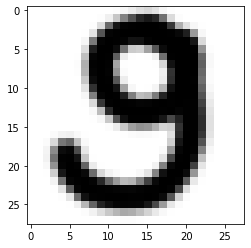

Выходные значения нейронной сети:
0 - [0.01316196]
1 - [0.00237654]
2 - [0.00411443]
3 - [0.26260847]
4 - [0.01069386]
5 - [0.02338238]
6 - [0.03112144]
7 - [0.00139897]
8 - [0.23235442]
9 - [0.17811405]
Ответ нейросети:  3
Эффективность =  0.5


In [68]:
scorecard = []

for record in my_data_list:
    all_values = record.split(',') # получить список значений из записи, используя символы запятой (',') в качестве разделителей
    
    img_array = numpy.asfarray(all_values[1:]).reshape(28, 28)
    matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')
    matplotlib.pyplot.show()

    correct_label = int(all_values[0]) # правильный ответ - первое значение
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 # масштабировать и сместить входные значения
    outputs = n.query(inputs) # опрос сети

    i = 0
    print("Выходные значения нейронной сети:")
    for o in outputs:
        print(i, '-', o)
        i = i + 1

    label = numpy.argmax(outputs)
    print("Ответ нейросети: ", label)

    # присоединить оценку ответа сети к концу списка
    if (label == correct_label):
        scorecard.append(1) # в случае правильного ответа сети присоединить к списку значение 1
    else:
        scorecard.append(0) # в случае неправильного ответа сети присоединить к списку значение 0

# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print("Эффективность = ", scorecard_array.sum() / scorecard_array.size)